In [ ]:
# 선형회귀에서의 tensorflow 사용
# 집값에 여향을 미치는 요인과 집값 예상해보자.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras


# random 설정 초기화
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('housing.csv', delim_whitespace=True, header=None)

df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


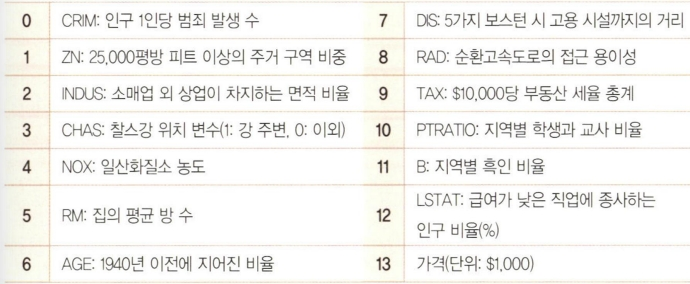

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


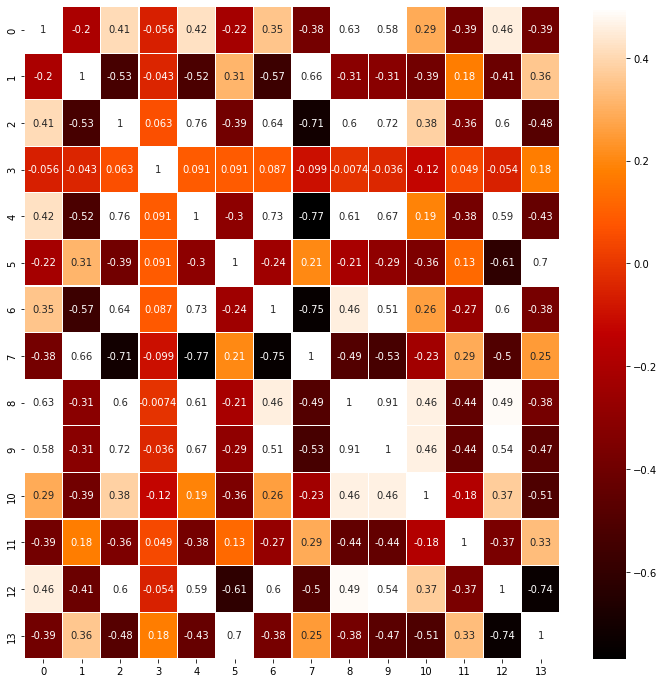

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# 분석을 위해 A와 B의 관계를 나타내는 콜레이션 매트릭스를 출력해본다.
# 1에 가까우면 양의 상관성, -1에 가까우면 음의 상관성이 있다고 한다.
display(df.corr())

# 히트맵으로 확인해본다.
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
            linecolor='white', annot=True)
plt.show()

In [2]:
dataset = df.values
print(dataset)

X = dataset[:, 0:13]
Y = dataset[:, 13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)
X_train

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


array([[1.62864e+00, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.96900e+02, 3.44100e+01],
       [1.14600e-01, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
        3.94960e+02, 7.73000e+00],
       [5.57780e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.94670e+02, 1.69600e+01],
       ...,
       [1.50980e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94510e+02, 1.03000e+01],
       [2.29270e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.92740e+02, 1.88000e+01],
       [1.39140e-01, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.96900e+02, 1.46900e+01]])

In [23]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 13, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'relu'))
# 분류가 아니기 때문에, sigmoid, softmax없이 각 node마다 1:1로 비교한다.
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

model.compile(loss='mean_squared_error', optimizer = 'adam', metrics = 'mse')
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 20, validation_split = 0.3)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                420       
                                                                 
 dense_22 (Dense)            (None, 6)                 186       
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 874.0662 - mse: 874.0662 - val_loss: 253.2059 - val_mse: 253.2059
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 261.1310 - mse: 261.1310 - val_loss: 151.1642 - val_mse: 151.1642
Epoch 3/100
13/13 [======================

In [24]:
# 값 실제 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f} , 예상가격 {:.3f}".format(label, prediction))

실제가격: 22.600 , 예상가격 20.943
실제가격: 50.000 , 예상가격 21.173
실제가격: 23.000 , 예상가격 27.883
실제가격: 8.300 , 예상가격 13.429
실제가격: 21.200 , 예상가격 19.838
실제가격: 19.900 , 예상가격 25.153
실제가격: 20.600 , 예상가격 19.745
실제가격: 18.700 , 예상가격 26.913
실제가격: 16.100 , 예상가격 16.966
실제가격: 18.600 , 예상가격 14.578


In [25]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

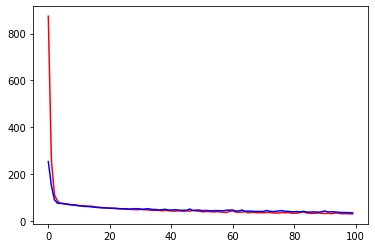

In [26]:

plt.plot(history.history['loss'], c = 'r')
plt.plot(history.history['val_loss'], c='b')
plt.show()